# Pre-processing (state / organization Name) Regulatory data for WaDE upload.
- Purpose:  To preprocess the data into one master file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/Washington/Regulatory_WDNR" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/Washington/Regulatory_WADNR


## Regulatory Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/WatershedAdministrativeUnits_ForestPracticesRegulation.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "re" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/WatershedAdministrativeUnits_ForestPracticesRegulation.zip', compression=dict(method='zip', archive_name='WatershedAdministrativeUnits_ForestPracticesRegulation.csv'), index=False)

print(len(dfin1))
dfin1.head()

846


,OBJECTID,WAU_ID,WAU_CD,WAU_NM,WSA_NO,WAU_LABEL_,WAU_ALIAS_,HYDRO_REF_,WAU_ACRES,WAU_UPLAND,BASIN_CD,BASIN_NM,SHAPEAREA,SHAPELEN,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,1,843,620402,S SALMO,0,S Salmo,"SOUTH SALMO, SALMO, S",SOUTH SALMO RIVER,15971.00000,15971.00000,6204,METALINE,695697638.00000,145636.56371,0.52318,0.00793,"POLYGON ((-117.03202 48.94642, -117.03767 48.9...",re0
1,2,842,620401,PEND OREILLE/SLATE CREEK,0,Pend Oreille/Slate Creek,SLATE CREEK,PEND OREILLE RIVER/SLATE CREEK,61059.80000,61059.80000,6204,METALINE,2659765934.50000,243762.40452,0.86843,0.03028,"POLYGON ((-117.15247 48.93326, -117.15341 48.9...",re1
2,3,819,610101,CEDAR CREEK/FISH CREEK,0,Cedar Creek/Fish Creek,CEDAR CREEK,CEDAR CREEK/FISH CREEK,21718.10000,21718.10000,6101,SOUTHEAST-DEEP CREEK,946039126.50000,150232.64596,0.54401,0.01078,"POLYGON ((-117.61222 49.00072, -117.58276 49.0...",re2
3,4,821,610103,UPPER LAKE ROOSEVELT/DEEP CREEK,0,Upper Lake Roosevelt/Deep Creek,"NORTHPORT, CEDAR CREEK",UPPER LAKE ROOSEVELT/DEEP CREEK,32578.10000,32578.10000,6101,SOUTHEAST-DEEP CREEK,1419099958.50000,221595.75738,0.72851,0.01614,"POLYGON ((-117.61222 49.00072, -117.61196 48.9...",re3
4,5,26,10519,BIRCH BAY,0,Birch Bay,,BIRCH BAY,179897.30000,23469.60000,0105,DELTA,7836309438.00000,422079.80803,1.59273,0.08917,"POLYGON ((-122.63647 48.87744, -122.63717 48.8...",re4


In [4]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "8/2/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "WDNRre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["WAU_LABEL_"]
df['in_ReportingUnitNativeID'] = "wa" + dfin1["WAU_ID"].astype(int).astype(str).str.strip()
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Watershed Administrative Units"
df['in_ReportingUnitUpdateDate'] = "1/7/2021"
df['in_StateCV'] = "WA"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Washington Department of Natural Resources"
df['in_RegulatoryDescription'] = "a structured approach to developing a forest practices plan for a WAU based on a biological and physical inventory"
df['in_RegulatoryName'] = dfin1["WAU_LABEL_"]
df['in_RegulatoryOverlayNativeID'] = dfin1["WAU_ID"].astype(int).astype(str).str.strip()
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] =""
df['in_StatutoryEffectiveDate'] = "8/2/1992"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Watershed Administrative Units"
df['in_WaterSourceTypeCV'] = "Surface Water"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

846


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re0,8/2/2023,2023,WDNRre_O1,4326,S Salmo,wa843,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,S Salmo,843,Active,,,8/2/1992,,Watershed Administrative Units,Surface Water
1,re1,8/2/2023,2023,WDNRre_O1,4326,Pend Oreille/Slate Creek,wa842,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Pend Oreille/Slate Creek,842,Active,,,8/2/1992,,Watershed Administrative Units,Surface Water
2,re2,8/2/2023,2023,WDNRre_O1,4326,Cedar Creek/Fish Creek,wa819,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Cedar Creek/Fish Creek,819,Active,,,8/2/1992,,Watershed Administrative Units,Surface Water
3,re3,8/2/2023,2023,WDNRre_O1,4326,Upper Lake Roosevelt/Deep Creek,wa821,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Upper Lake Roosevelt/Deep Creek,821,Active,,,8/2/1992,,Watershed Administrative Units,Surface Water
4,re4,8/2/2023,2023,WDNRre_O1,4326,Birch Bay,wa26,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Birch Bay,26,Active,,,8/2/1992,,Watershed Administrative Units,Surface Water


## Regulatory Area #2

In [5]:
# etc etc,

## Concatenate DataFrames together

In [6]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

846


## Clean Data / data types

In [7]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [8]:
outdf['in_ReportingUnitName'] = df.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['S Salmo', 'Pend Oreille/Slate Creek', 'Cedar Creek/Fish Creek',
       'Upper Lake Roosevelt/Deep Creek', 'Birch Bay', 'Big Sheep Creek',
       'Kettle River/Deep Creek', 'Drayton', 'Independent Creek',
       'Lynden', 'W Deer Creek', 'Sumas River', 'Sullivan', 'Vedder',
       'Tonata Creek', 'Myers Creek', 'Silesia Creek', 'Tonasket Creek',
       'Similkameen River', 'Chilliwack', 'Boulder Creek', 'Silver Creek',
       'Lone Ranch', 'Hozomeen', 'Lightning Creek', 'Ashnola River',
       'Pasayten River', 'Upper Chewuch River', 'NF Toats Coulee',
       'Canyon/Whistler', 'Gold Creek', 'Toulou Creek', 'Lower Toroda',
       'Flat Creek', 'NF Deep Creek', 'Little Boulder Creek',
       'Little Beaver Creek', 'Deming', 'Onion Creek', 'SF Toats Coulee',
       'Three Fools Creek', 'Shuksan', 'Emanuel Creek', 'Tenmile Creek',
       'Wannacut-Spectacle-Whitestone', 'Ferndale',
       'Upper Okanogan River', 'Mazama', 'Chopaka', 'Warnick',
       'Lost River', 'Pend Oreille/Ced

In [9]:
outdf['in_RegulatoryDescription'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['a structured approach to developing a forest practices plan for a WAU based on a biological and physical inventory'],
      dtype=object)

In [10]:
outdf['in_RegulatoryName'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['S Salmo', 'Pend Oreille/Slate Creek', 'Cedar Creek/Fish Creek',
       'Upper Lake Roosevelt/Deep Creek', 'Birch Bay', 'Big Sheep Creek',
       'Kettle River/Deep Creek', 'Drayton', 'Independent Creek',
       'Lynden', 'W Deer Creek', 'Sumas River', 'Sullivan', 'Vedder',
       'Tonata Creek', 'Myers Creek', 'Silesia Creek', 'Tonasket Creek',
       'Similkameen River', 'Chilliwack', 'Boulder Creek', 'Silver Creek',
       'Lone Ranch', 'Hozomeen', 'Lightning Creek', 'Ashnola River',
       'Pasayten River', 'Upper Chewuch River', 'NF Toats Coulee',
       'Canyon/Whistler', 'Gold Creek', 'Toulou Creek', 'Lower Toroda',
       'Flat Creek', 'NF Deep Creek', 'Little Boulder Creek',
       'Little Beaver Creek', 'Deming', 'Onion Creek', 'SF Toats Coulee',
       'Three Fools Creek', 'Shuksan', 'Emanuel Creek', 'Tenmile Creek',
       'Wannacut-Spectacle-Whitestone', 'Ferndale',
       'Upper Okanogan River', 'Mazama', 'Chopaka', 'Warnick',
       'Lost River', 'Pend Oreille/Ced

In [11]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

array(['1992-08-02T00:00:00.000000000'], dtype='datetime64[ns]')

# Shapefile Data
- For attaching geometry to reporting unit info.

#### Regulatory Area #1 shapefile info

In [21]:
# Input File
shapeInputFile = "RawInputData/shapefiles/WatershedAdministrativeUnits_ForestPracticesRegulation.zip"
gdfin1 = gpd.read_file(shapeInputFile)
print(len(gdfin1))
gdfin1.head()

846


,OBJECTID,WAU_ID,WAU_CD,WAU_NM,WSA_NO,WAU_LABEL_,WAU_ALIAS_,HYDRO_REF_,WAU_ACRES,WAU_UPLAND,BASIN_CD,BASIN_NM,SHAPEAREA,SHAPELEN,Shape_Leng,Shape_Area,geometry
0,1,843,620402,S SALMO,0,S Salmo,"SOUTH SALMO, SALMO, S",SOUTH SALMO RIVER,15971.00000,15971.00000,6204,METALINE,695697638.00000,145636.56371,0.52318,0.00793,"POLYGON ((-117.03202 48.94642, -117.03767 48.9..."
1,2,842,620401,PEND OREILLE/SLATE CREEK,0,Pend Oreille/Slate Creek,SLATE CREEK,PEND OREILLE RIVER/SLATE CREEK,61059.80000,61059.80000,6204,METALINE,2659765934.50000,243762.40452,0.86843,0.03028,"POLYGON ((-117.15247 48.93326, -117.15341 48.9..."
2,3,819,610101,CEDAR CREEK/FISH CREEK,0,Cedar Creek/Fish Creek,CEDAR CREEK,CEDAR CREEK/FISH CREEK,21718.10000,21718.10000,6101,SOUTHEAST-DEEP CREEK,946039126.50000,150232.64596,0.54401,0.01078,"POLYGON ((-117.61222 49.00072, -117.58276 49.0..."
3,4,821,610103,UPPER LAKE ROOSEVELT/DEEP CREEK,0,Upper Lake Roosevelt/Deep Creek,"NORTHPORT, CEDAR CREEK",UPPER LAKE ROOSEVELT/DEEP CREEK,32578.10000,32578.10000,6101,SOUTHEAST-DEEP CREEK,1419099958.50000,221595.75738,0.72851,0.01614,"POLYGON ((-117.61222 49.00072, -117.61196 48.9..."
4,5,26,10519,BIRCH BAY,0,Birch Bay,None,BIRCH BAY,179897.30000,23469.60000,0105,DELTA,7836309438.00000,422079.80803,1.59273,0.08917,"POLYGON ((-122.63647 48.87744, -122.63717 48.8..."


<AxesSubplot: >

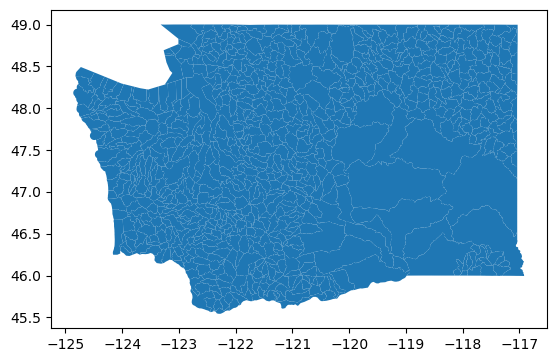

In [22]:
# plot shape info to map
gdfin1.plot()

In [25]:
# create output for Regulatory Area #1 dataframe
columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] = "wa" + gdfin1["WAU_ID"].astype(int).astype(str).str.strip() # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

846


,in_ReportingUnitNativeID,geometry
0,wa843,"POLYGON ((-117.03202 48.94642, -117.03767 48.9..."
1,wa842,"POLYGON ((-117.15247 48.93326, -117.15341 48.9..."
2,wa819,"POLYGON ((-117.61222 49.00072, -117.58276 49.0..."
3,wa821,"POLYGON ((-117.61222 49.00072, -117.61196 48.9..."
4,wa26,"POLYGON ((-122.63647 48.87744, -122.63717 48.8..."


#### Regulatory Area #2 shapefile info

In [15]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [16]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

846


,in_ReportingUnitNativeID,geometry
0,wa843,"POLYGON ((-117.03202 48.94642, -117.03767 48.9..."
1,wa842,"POLYGON ((-117.15247 48.93326, -117.15341 48.9..."
2,wa819,"POLYGON ((-117.61222 49.00072, -117.58276 49.0..."
3,wa821,"POLYGON ((-117.61222 49.00072, -117.61196 48.9..."
4,wa26,"POLYGON ((-122.63647 48.87744, -122.63717 48.8..."


## Export Data

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                               object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [20]:
outdf

,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re0,8/2/2023,2023,WDNRre_O1,4326,S Salmo,wa843,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,S Salmo,843,Active,,,1992-08-02,,Watershed Administrative Units,Surface Water
1,re1,8/2/2023,2023,WDNRre_O1,4326,Pend Oreille/Slate Creek,wa842,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Pend Oreille/Slate Creek,842,Active,,,1992-08-02,,Watershed Administrative Units,Surface Water
2,re2,8/2/2023,2023,WDNRre_O1,4326,Cedar Creek/Fish Creek,wa819,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Cedar Creek/Fish Creek,819,Active,,,1992-08-02,,Watershed Administrative Units,Surface Water
3,re3,8/2/2023,2023,WDNRre_O1,4326,Upper Lake Roosevelt/Deep Creek,wa821,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Upper Lake Roosevelt/Deep Creek,821,Active,,,1992-08-02,,Watershed Administrative Units,Surface Water
4,re4,8/2/2023,2023,WDNRre_O1,4326,Birch Bay,wa26,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Birch Bay,26,Active,,,1992-08-02,,Watershed Administrative Units,Surface Water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,re841,8/2/2023,2023,WDNRre_O1,4326,Lannigan Spring,wa573,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Lannigan Spring,573,Active,,,1992-08-02,,Watershed Administrative Units,Surface Water
842,re842,8/2/2023,2023,WDNRre_O1,4326,Upper Green River,wa164,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Upper Green River,164,Active,,,1992-08-02,,Watershed Administrative Units,Surface Water
843,re843,8/2/2023,2023,WDNRre_O1,4326,Big Creek,wa576,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Big Creek,576,Active,,,1992-08-02,,Watershed Administrative Units,Surface Water
844,re844,8/2/2023,2023,WDNRre_O1,4326,Quartz Mtn,wa587,,Watershed Administrative Units,1/7/2021,WA,,Washington Department of Natural Resources,a structured approach to developing a forest p...,Quartz Mtn,587,Active,,,1992-08-02,,Watershed Administrative Units,Surface Water


In [26]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pre_wdnrMain.zip', compression=dict(method='zip', archive_name='Pre_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.